# 04_02: Loading station data

In [46]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

Before we load the data itself, it's always a good idea to start by looking at the documentation. Browsing through the file listing at https://www.ncei.noaa.gov/pub/data/ghcn/daily, we see a `readme.txt`. We'll start there.

For your convenience I have included it in the exercise files, but you can download an updated version using a command-line tool such as `wget`, or using Python with a library like `requests`.

In [5]:
# import requests
# r = requests.get('https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt')
# open('readme.txt', 'w').write(r.text)

We can use Jupyter notebook to look at the readme.txt file. We see that it describes the contents of the directory; the format of the "dly" weather data files, which contain data for a single station, and are formatted with fixed-width columns; and the format of a file `ghcnd-stations.txt` that gives us the location, elevation, and id for each station in the network.

That file is already in your exercise files.

For your reference, I have copied the description of this file's format into this notebook.

    IV. FORMAT OF "ghcnd-stations.txt"

    ------------------------------
    Variable   Columns   Type
    ------------------------------
    ID            1-11   Character
    LATITUDE     13-20   Real
    LONGITUDE    22-30   Real
    ELEVATION    32-37   Real
    STATE        39-40   Character
    NAME         42-71   Character
    GSN FLAG     73-75   Character
    HCN/CRN FLAG 77-79   Character
    WMO ID       81-85   Character
    ------------------------------


Let's look at the file itself.

To load a fixed-width text file such as this, we can use np.genfromtxt. It needs rather precise information:

* we specify the width of each field in the parameter `delimiter`; we derive the widths from the table above, but we need to increase them to include the spaces between columns; 
* next, we provide names for each column, _and_
* ...we specify the dtype of each column: we need a string of up to 11 characters, three double-precision floats, and a few more strings of 3, 31, 4, 4, and 6 characters respectively.
* Last, we instruct numpy to remove leading and trailing spaces from all the strings it parses.

In [11]:
stations = np.genfromtxt('ghcnd-stations.txt', delimiter=[11,9,10,7,3,31,4,4,6],
                                               names=['id','latitude','longitude','elevation','state','name',
                                                      'gsn','hcn','wmo'],
                                               dtype=['U11','d','d','d','U3','U31','U4','U4','U6'],
                                               autostrip=True)

The result is a NumPy record array with more than a hundred thousand entries. Thankfully NumPy shows us only a few lines at the top and bottom.

In [16]:
len(stations)

127994

In [17]:
stations

array([('ACW00011604',  17.1167, -61.7833,   10.1, '', 'ST JOHNS COOLIDGE FLD', '', '', ''),
       ('ACW00011647',  17.1333, -61.7833,   19.2, '', 'ST JOHNS', '', '', ''),
       ('AE000041196',  25.333 ,  55.517 ,   34. , '', 'SHARJAH INTER. AIRP', 'GSN', '', '41196'),
       ...,
       ('ZI000067977', -21.017 ,  31.583 ,  430. , '', 'BUFFALO RANGE', '', '', '67977'),
       ('ZI000067983', -20.2   ,  32.616 , 1132. , '', 'CHIPINGE', 'GSN', '', '67983'),
       ('ZI000067991', -22.217 ,  30.    ,  457. , '', 'BEITBRIDGE', '', '', '67991')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

By plotting longitude against latitude, we get an idea of the impressive global coverage of the database. We need to make the dots small so that their not too crowded, and even so the U.S. and Europe are masses of ink.

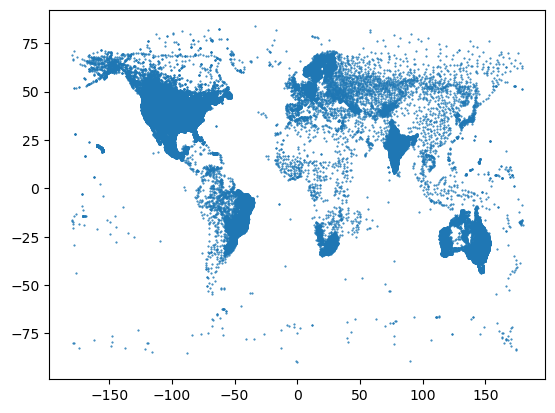

In [18]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

How about stations in California? We can use fancy indexing with a boolean condition to downselect our dataset.

In [19]:
stations_ca = stations[stations['state'] == 'CA']

Coverage is still impressive.

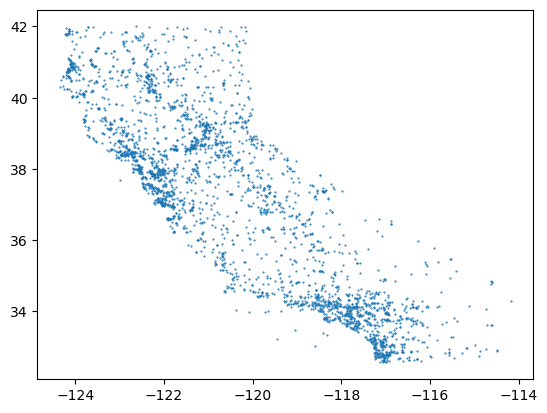

In [20]:
pp.plot(stations_ca['longitude'], stations_ca['latitude'], '.', markersize=1)

What if we need a specific station? Fancy indexing again comes to the rescue. We select all stations for which it is true that the name field equals Pasadena.

In [21]:
stations[stations['name'] == 'PASADENA']

array([('USC00046719', 34.1483, -118.1447, 263.3, 'CA', 'PASADENA', '', 'HCN', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])

Only one? There must be stations whose name _begins_ with "Pasadena". We can find them using the string function `startswith`, which in NumPy sits with other string functions in the submodule `numpy.char`.

In [28]:
stations[np.char.startswith(stations['name'], 'PASADENA')]

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1CALA0124', 34.1336, -118.1416, 234.1, 'CA', 'PASADENA 1.9 S', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.674

Nevertheless, we'll use the first one we found, which belongs to the HCN network and is likely to have more data.

In [45]:
# r = requests.get('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly')
# open('PASADENA.dly', 'w').write(r.text)

Let us look at the file... it's messy, but we recognize the station id at the beginning of each line, followed by year and month, the name of an element (for instance, minimum or maximum daily temperature), and 31 data points, one for each day of the month. Each data point consists of a value and a flag, which we will ignore in this exercise.

We could use genfromtxt again, but it's going to take us a long time. So I prepared a small module, `getweather` that takes care of parsing the file and returning consecutive daily values for a year. (For simplicity, we will forget about February 29 in leap years.) The module uses pandas to clean and reformat data, but returns it as pure numpy arrays. After we introduce pandas, I encourage you to go look at `getweather.py` and see what I did there to parse the file.

We import the module (it sits in this very working directory), then we look at the help text (known as "docstring") for `getweather`.

In [36]:
import getweather

In [37]:
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



Let's try it on Pasadena, requesting TMIN and TMAX, the minimum and maximum temperature. Excellent. We see that the result is a NumPy record array with two double-precision fields, TMIN, and TMAX. The values are in degrees Celsius. Some measurements are missing, and they are represented as NaN, not a number.

In [44]:
getweather.getyear('PASADENA', ['TMIN','TMAX'], 2000)

array([( 6.1, 14.4), ( 6.1, 18.3), ( 3.9, 18.3), ( 6.1, 20. ),
       ( 6.1, 20.6), ( 5.6, 20. ), ( 5.6, 18.3), ( 3.3, 21.7),
       ( 5. , 20.6), ( 6.1, 18.3), ( 6.7, 18.9), ( 8.3, 17.8),
       ( 7.8, 24.4), (11.1, 26.1), (12.8, 26.1), (13.3, 23.9),
       (13.3, 20.6), (13.9, 24.4), (11.1, 25.6), (12.8, 21.7),
       (11.7, 18.3), (10. , 18.3), ( 7.8, 20. ), (11.7, 22.8),
       (12.2, 21.7), ( 8.3, 20.6), ( 7.2, 20.6), ( 6.1, 21.7),
       ( 6.7, 21.7), (10. , 17.8), (11.1, 16.7), (13.3, 24.4),
       (11.1, 26.7), ( 9.4, 26.7), ( 8.9, 23.9), (10.6, 21.1),
       ( 6.7, 25. ), ( nan,  nan), (15.6, 26.7), (10. , 23.9),
       (10.6, 19.4), ( 5. , 18.3), ( 9.4, 17.8), ( 9.4, 15.6),
       (10.6, 16.7), ( 8.9, 19.4), (10. , 16.7), ( 7.2, 17.2),
       ( 6.1, 22.2), ( 7.8, 25. ), ( 9.4, 23.9), ( 6.7, 13.3),
       ( 7.2, 13.9), ( 7.8, 12.8), ( 2.8, 16.1), ( 8.3, 15. ),
       ( 5.6, 21.7), ( 8.3, 20.6), ( 4.4, 17.2), ( 7.2, 18.3),
       ( 6.7, 19.4), ( 7.2, 22.2), (17.2, 20. ), ( 7.2,

This function will be a great foundation for our work in the rest of this chapter.